Initial Data Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Missing values before cleaning:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare      

<ipython-input-1-07fd41a40a38>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
<ipython-input-1-07fd41a40a38>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

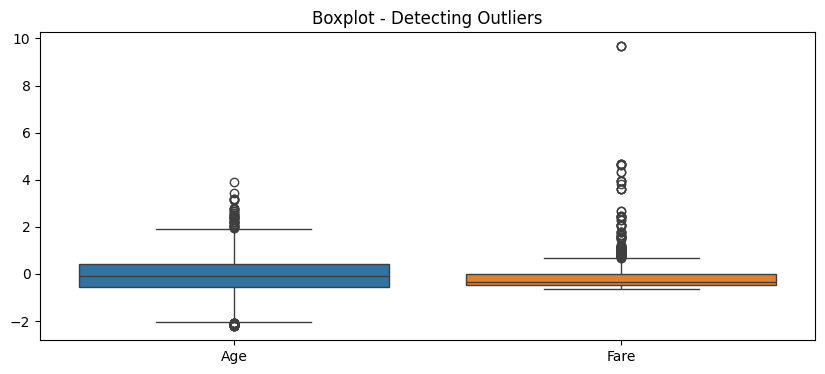


Final dataset shape after cleaning: (718, 12)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# Task 1: Data Cleaning & Preprocessing - Titanic Dataset (Internship Task)

# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from google.colab import files

# STEP 2: Load Dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
print("Initial Data Overview:\n")
print(df.info())
print("\nMissing values before cleaning:\n", df.isnull().sum())

# STEP 3: Handle Missing Values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
df.drop(columns=["Cabin"], inplace=True)  # Too many nulls

print("\nMissing values after cleaning:\n", df.isnull().sum())

# STEP 4: Encode Categorical Variables
# Label Encode 'Sex'
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 0 = female, 1 = male

# One-hot Encode 'Embarked' (drop first to avoid dummy trap)
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

# STEP 5: Normalize Numerical Features
scaler = StandardScaler()
df[["Age", "Fare"]] = scaler.fit_transform(df[["Age", "Fare"]])

# STEP 6: Visualize Outliers
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[["Age", "Fare"]])
plt.title("Boxplot - Detecting Outliers")
plt.show()

# STEP 7: Remove Outliers Using IQR Method
for col in ["Age", "Fare"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("\nFinal dataset shape after cleaning:", df.shape)

# STEP 8: Save and Download Cleaned Dataset
df.to_csv("cleaned_titanic.csv", index=False)
files.download("cleaned_titanic.csv")
